##                        Salary Project

Problem Statement
Predict the salary if the employee using the features provided in the data. 


In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the  dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
#to check column names
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

#### EDA

Descriptive statistics of quantitative data:

In [6]:
df.describe()


,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


#### Studying the distribution of dependent and independent variables¶

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

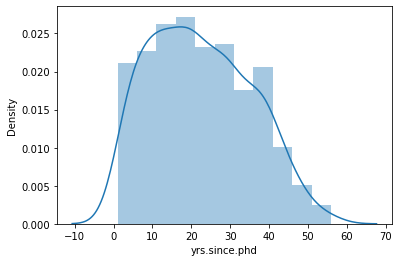

In [7]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

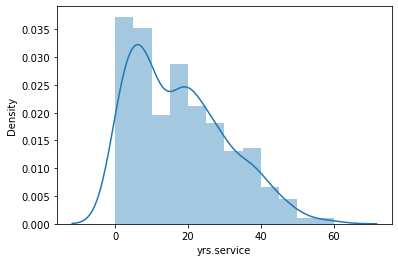

In [8]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

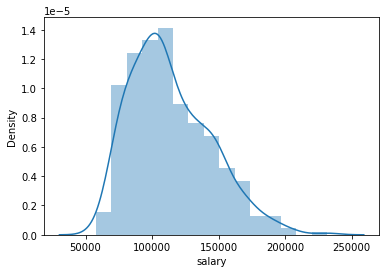

In [9]:
sns.distplot(df['salary'])

In [10]:
# to see unique values in the columns
print(df['rank'].unique())
print(df['discipline'].unique())
print(df['sex'].unique())


['Prof' 'AsstProf' 'AssocProf']
['B' 'A']
['Male' 'Female']


In [11]:
print(df['rank'].value_counts())
print(df['discipline'].value_counts())
print(df['sex'].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [12]:
le=LabelEncoder()
list1=['rank','discipline','sex']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


### visualization

<Figure size 1440x1440 with 0 Axes>

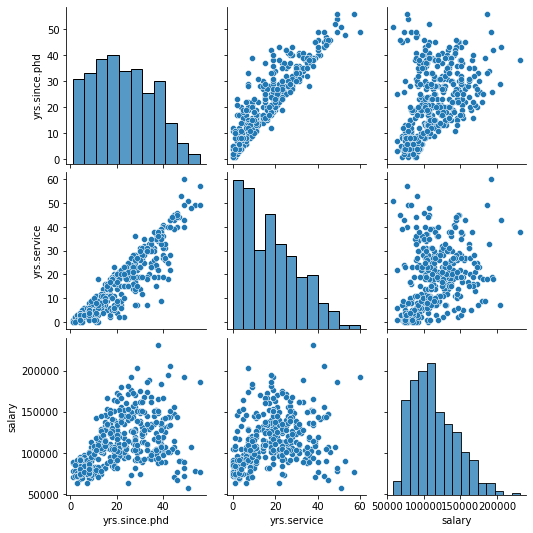

In [13]:
fig = plt.figure(figsize = (20,20))
sns.pairplot(df[['yrs.since.phd', 'yrs.service', 'salary']])

<AxesSubplot:ylabel='count'>

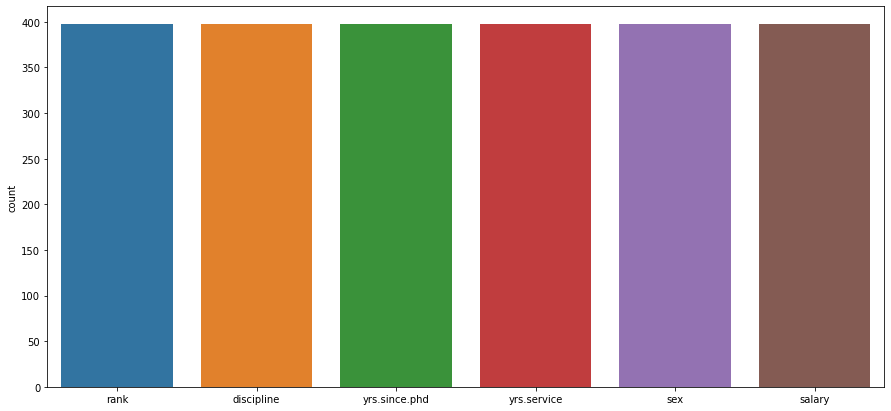

In [14]:
fig = plt.figure(figsize = (15,7))
sns.countplot(data = df)

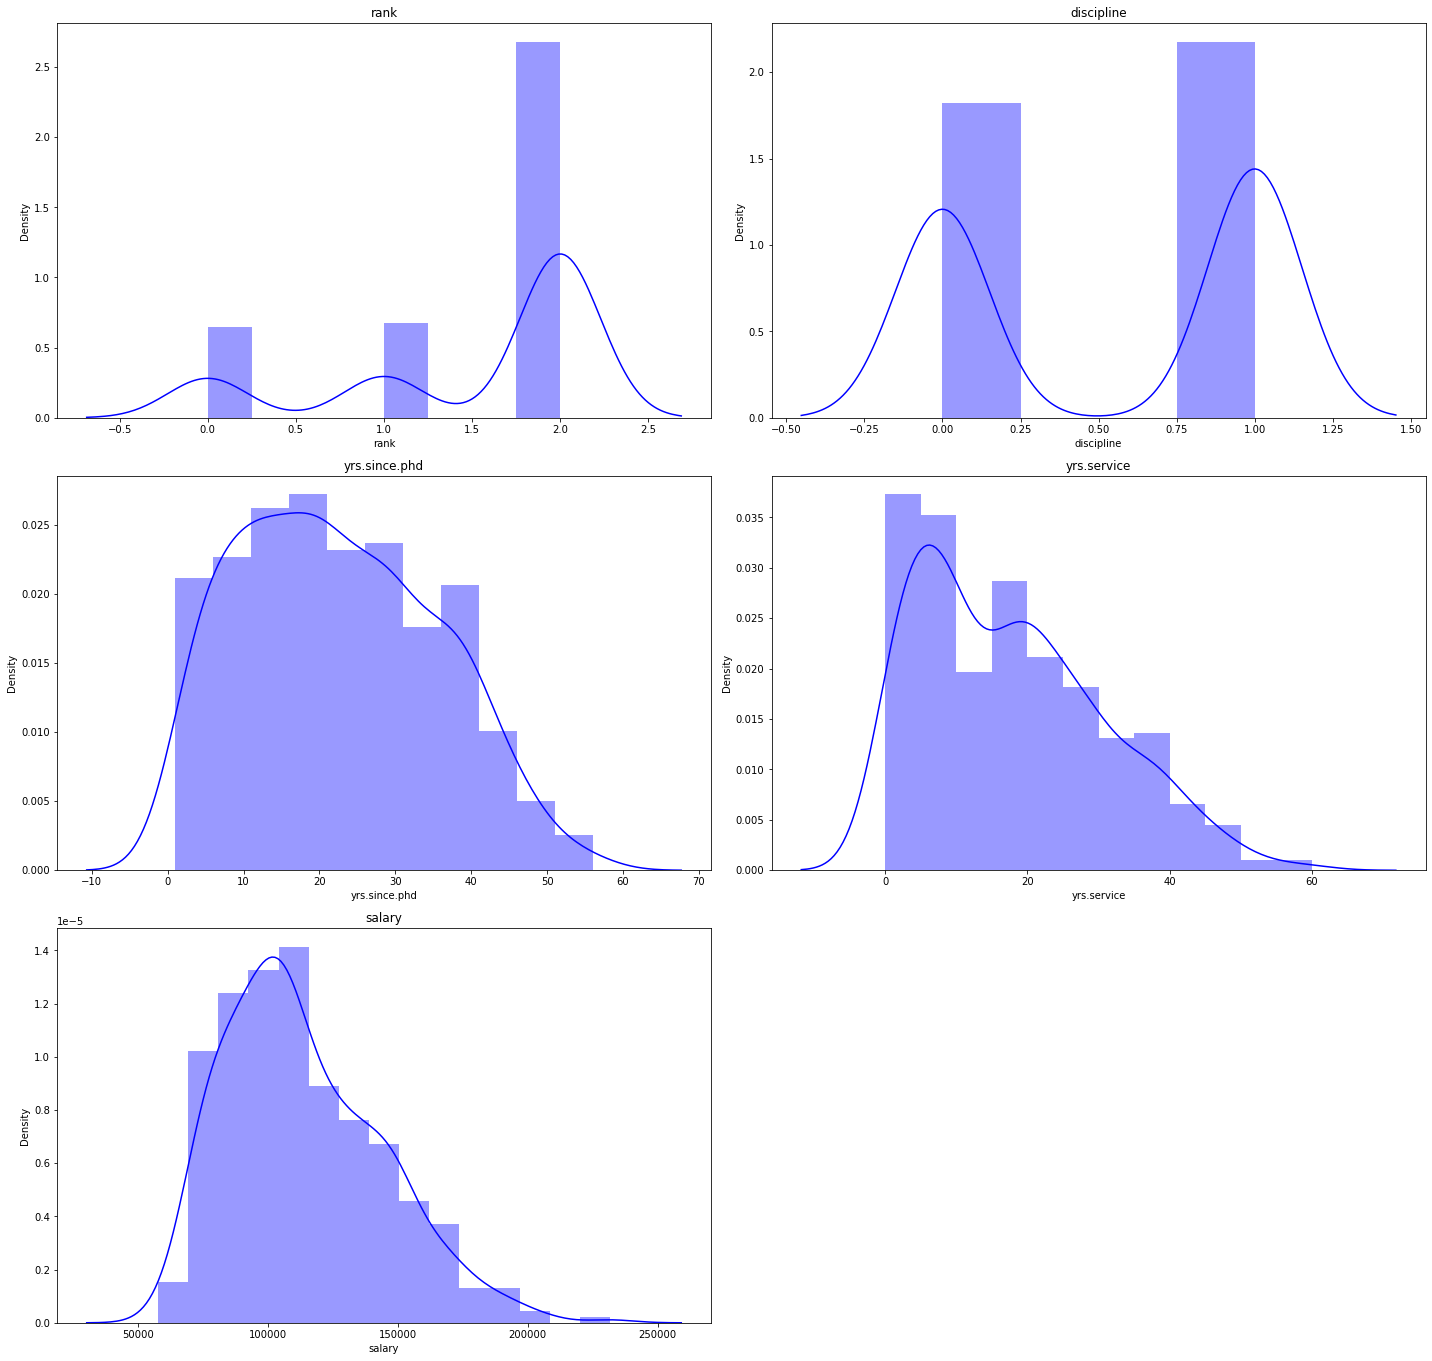

In [15]:
columns = ['rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'salary']
plt.figure(figsize = (20,50))
for i in range(len(columns)):
    plt.subplot(8,2, i+1)
    sns.distplot(df[columns[i]],color = 'blue');
    plt.title(columns[i])
plt.tight_layout()

#### Correlation

In [16]:
corr_matrix = df.corr()
corr_matrix

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

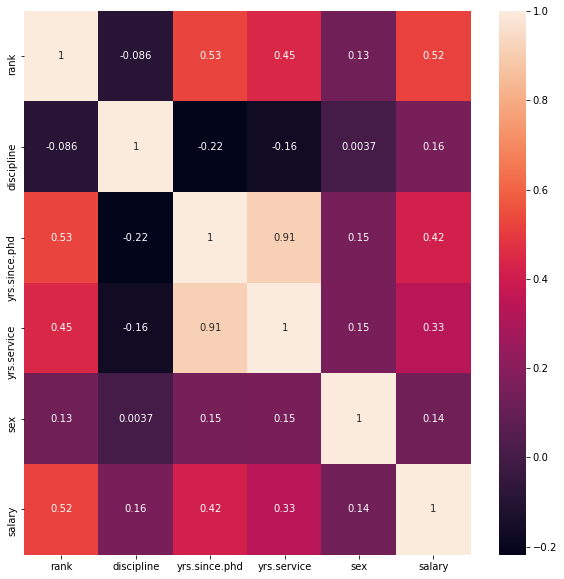

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,annot = True)

#### Checking Outliars

rank                AxesSubplot(0.125,0.125;0.110714x0.755)
discipline       AxesSubplot(0.257857,0.125;0.110714x0.755)
yrs.since.phd    AxesSubplot(0.390714,0.125;0.110714x0.755)
yrs.service      AxesSubplot(0.523571,0.125;0.110714x0.755)
sex              AxesSubplot(0.656429,0.125;0.110714x0.755)
salary           AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

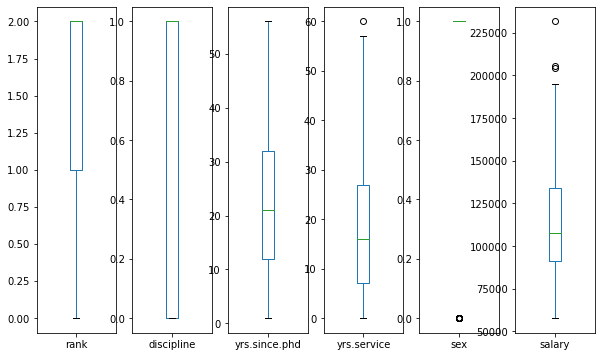

In [18]:
df.plot(kind='box',subplots=True,layout=(1,6),figsize=(10,6))

#### Dropping the outliars

In [19]:
df = df.drop(np.where(df['salary'] > 200000)[0])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [20]:
df = df.drop(np.where(df['yrs.service'] >40)[0])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
5,0,1,6,6,1,97000
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


#### Data loss due to dropping duplicates

In [21]:
from scipy.stats import zscore
from scipy import stats
import numpy as np
z=np.abs(zscore(df))
z

array([[0.65166301, 0.89335151, 0.23890626, 0.0547016 , 0.33629635,
        0.92833642],
       [0.65166301, 0.89335151, 0.16059693, 0.10206773, 0.33629635,
        2.08306374],
       [0.66575302, 0.89335151, 1.41354613, 1.12106833, 0.33629635,
        1.14292336],
       ...,
       [0.65166301, 1.11938021, 1.56220822, 0.60339423, 0.33629635,
        0.38387569],
       [0.65166301, 1.11938021, 0.23094969, 0.18045239, 0.33629635,
        0.60512076],
       [0.66575302, 1.11938021, 1.10030883, 1.04268367, 0.33629635,
        1.09856388]])

In [22]:
threshold=3
print(np.where(z>3))

(array([125, 310], dtype=int64), array([3, 3], dtype=int64))


In [23]:
len(np.where(z>3)[0])

2

In [24]:
newdf = df[(z < 3).all(axis=1)]

In [25]:
print("old dataframe",df.shape)
print("newdataframe",newdf.shape)
print("drop totall no of row droped",df.shape[0]-newdf.shape[0])

old dataframe (374, 6)
newdataframe (372, 6)
drop totall no of row droped 2


In [26]:
total_loss=(374-372)/374*100
total_loss#loss iss very negligable

0.53475935828877

##### Splitting the data in independent and dependent variable

In [27]:
X=newdf.iloc[:,:-1]
y=newdf.iloc[:,-1]

#### transforming the data remove skewness¶

In [28]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')
X

array([[ 0.6947695 ,  0.89280538, -0.09983932,  0.28189321,  0.33730173],
       [ 0.6947695 ,  0.89280538, -0.02065185,  0.13238413,  0.33730173],
       [-1.07255689,  0.89280538, -1.61827666, -1.28142386,  0.33730173],
       ...,
       [ 0.6947695 , -1.12006493,  1.44572738,  0.74413502,  0.33730173],
       [ 0.6947695 , -1.12006493,  0.35391891,  0.05385329,  0.33730173],
       [-1.07255689, -1.12006493, -1.12008668, -1.11642628,  0.33730173]])

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 0.6947695 ,  0.89280538, -0.09983932,  0.28189321,  0.33730173],
       [ 0.6947695 ,  0.89280538, -0.02065185,  0.13238413,  0.33730173],
       [-1.07255689,  0.89280538, -1.61827666, -1.28142386,  0.33730173],
       ...,
       [ 0.6947695 , -1.12006493,  1.44572738,  0.74413502,  0.33730173],
       [ 0.6947695 , -1.12006493,  0.35391891,  0.05385329,  0.33730173],
       [-1.07255689, -1.12006493, -1.12008668, -1.11642628,  0.33730173]])

#### Model making

In [31]:
def model(mod):
    max_score=0
    max_random_state=0
    for x in range (42,102):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=mod()
        md.fit(X_train,y_train)
        md_predict=md.predict(X_test)
        r2score=r2_score(y_test,md_predict)
        MSE=mean_squared_error(y_test,md_predict)
        if max_score<r2score:
            max_score=r2score
            max_random_state=x
    print("Max score is {} at {} random state at {} MSE".format(max_score,max_random_state,MSE))

In [32]:
model(LinearRegression)

Max score is 0.5204763194054784 at 83 random state at 441503051.4785506 MSE


In [33]:
model(AdaBoostRegressor)

Max score is 0.5407780252909437 at 68 random state at 419414707.0231043 MSE


In [34]:
model(RandomForestRegressor)

Max score is 0.5044812111121963 at 56 random state at 493898075.24122965 MSE


In [ ]:
#Ada boost is the best model comparing there score and MSE